In [2]:
import numpy as np
from LibPython.Library import DiffEq
from matplotlib import pyplot as plt

In [3]:
def junction(t, y, paramlist, vsave, noisy=False, noiselevel=0.01):
    I, Ic0, Q = tuple(paramlist)
    rand = np.random.normal(scale=noiselevel)
    if Q >= 1:
        dg, g = tuple(y)
        ddg = I/Ic0 - (1/Q)*dg - np.sin(g) + noisy*rand*I
        vsave.append(dg)
        return np.array([ddg, dg])
    else:
        g = y
        dg = Q*(I/Ic0 - np.sin(g) + noisy*rand*I)
        vsave.append(dg)
        return np.array(dg)

In [3]:
start, stop = 0.75, 1.5
step = 1e-2
cycle = np.concatenate((np.arange(start, stop, step), np.flip(np.arange(start, stop, step))))

In [4]:
for Q in [1, 1e-2]:
    noiselist = [0.0, 0.1, 0.5]
    if Q == 1: noiselist = [0.00, 0.01, 0.05]
    for noise in noiselist:
        Ic0 = 1.0
        tend = numpoints = 1e3
        if Q<1: tend = 1/Q**2
        tlist = np.linspace(0, tend, int(numpoints))
        vlist = []; ilist = []
        start = [1.0, 1.0]

        for alp in cycle:
            I = Ic0*alp
            paramlist = [I, Ic0, Q]
            vtau = []
            d = DiffEq(lambda t, y, p : junction(t, y, p, vsave=vtau, noisy=bool(noise), noiselevel=noise), tlist, list(start), paramlist)
            y = d.runge_kutta()

            start = y[-1]
            v = np.average(vtau)
            vlist.append(v)
            ilist.append(I)
            try:
                if (Q<1) and ilist[-2]==ilist[-1]:
                    vlist.pop()
                    ilist.pop()
                    break
            except(IndexError):
                pass
        plt.plot(np.array(ilist)/(Ic0), np.array(vlist)/(Ic0), label=f"Noise = {noise}")
    plt.xlabel("I/Ic0")
    plt.ylabel("V/R*Ic0")
    plt.legend()
    plt.savefig(f"Q_{Q}.png")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [4]:
start, stop = 0.75, 1.5
step = 1e-2
cycle = np.arange(start, stop, step)

In [24]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"})

plt.rc('axes', labelsize=15)  

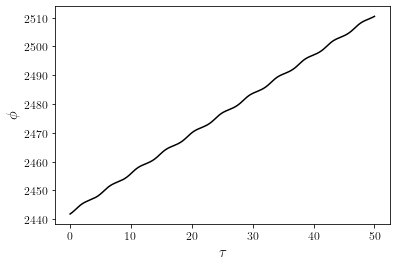

SystemExit: 

C:\Users\Spandan Anupam\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<Figure size 432x288 with 0 Axes>

In [36]:
from sys import exit
for Q in [1]:
    noiselist = [0.0]
    for noise in noiselist:
        Ic0 = 1.0
        tend = 50
        numpoints = 1e3
        tlist = np.linspace(0, tend, int(numpoints))
        vlist = []; ilist = []
        start = [1.0, 1.0]

        for alp in cycle:
            I = Ic0*alp
            paramlist = [I, Ic0, Q]
            vtau = []
            d = DiffEq(lambda t, y, p : junction(t, y, p, vsave=vtau, noisy=bool(noise), noiselevel=noise), tlist, list(start), paramlist)
            y = d.runge_kutta()

            start = y[-1]
            v = np.average(vtau)
            vlist.append(v)
            ilist.append(I)
            try:
                if (Q<1) and ilist[-2]==ilist[-1]:
                    vlist.pop()
                    ilist.pop()
                    break
            except(IndexError):
                pass
    # plt.plot(tlist, vtau)
    plt.plot(tlist, y[:-1, 1], c='black')
    plt.xlabel(r'$\tau$')
    plt.ylabel(r"$\phi$")
    plt.show()
    plt.savefig('./tauphi.pdf')
    plt.clf()
    exit()
    
    # plt.plot(tlist, vtau, c='black')
    plt.plot(tlist, y[:-1, 0], c='black')
    plt.xlabel(r'$\tau$')
    plt.ylabel(r"$V$")
    plt.ylim(np.min(y[:-1, 0])-2, np.max(y[:-1, 0])+2)
    plt.show()
    plt.savefig('tauV.eps')
    plt.clf()
    # plt.plot(tlist, np.array(vtau)[:1000, 0], c='black')
    # plt.xlabel(r'$\tau$')
    # plt.ylabel(r"V")
    # plt.show()
    # plt.plot(np.array(ilist)/(Ic0), np.array(vlist)/(Ic0), label=f"Noise = {noise}")
    # plt.xlabel("I/Ic0")
    # plt.ylabel("V/R*Ic0")
    # plt.legend()
    # plt.savefig(f"Q_{Q}.png")
    # plt.clf()